In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS , ExhaustiveFeatureSelector as EFS

- Sequentialforward selection(SFS)
- Sequentialbackward selection(SBS)
- Sequentialforward Floating selection(SFFS)
- Sequentialbackward Floating selection(SBFS)

In [10]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [11]:
data=load_wine()

In [15]:
type(data)

sklearn.utils.Bunch

In [16]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [17]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [18]:
X=pd.DataFrame(data.data)
Y=data.target

In [20]:
X.columns=data.feature_names
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [21]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((142, 13), (36, 13))

## Step Forward Feature Selection

In [34]:
#With all feature

sfs=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
        k_features=13,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=4,
        n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    8.3s finished

[2020-08-26 08:51:19] Features: 1/13 -- score: 0.7744132788250435[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.4s finished

[2020-08-26 08:51:25] Features: 2/13 -- score: 0.965233931410402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    6.3s finished

[2020-08-26 08:51:32] Features: 3/13 -- score: 0.9861003861003861[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished

[2020-08-26 08:51:37] Features: 4/13 -- score: 0.979

Observations
- Post 6 accuracy is 98% or 97%. It means the we can use subset of features to get good accuracy which help us to reduce the training time.
- Post 6 feature training time is high 3.3s or 2.0s
- On 7th Feature we have good accuracy.

In [36]:
sfs=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
        k_features=7,
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=4,
        n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    6.7s finished

[2020-08-26 08:53:52] Features: 1/7 -- score: 0.7744132788250435[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.9s finished

[2020-08-26 08:53:57] Features: 2/7 -- score: 0.965233931410402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.8s finished

[2020-08-26 08:54:02] Features: 3/7 -- score: 0.9861003861003861[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished

[2020-08-26 08:54:07] Features: 4/7 -- score: 0.9793543

In [37]:
sfs.k_feature_names_

('alcohol',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'flavanoids',
 'color_intensity',
 'od280/od315_of_diluted_wines')

In [38]:
print(sfs.k_feature_idx_,sfs.k_features,sfs.k_score_)

(0, 2, 3, 4, 6, 9, 11) 7 0.9932432432432432


In [40]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.774413,0.0559516,"[0.7567567567567568, 0.8333333333333334, 0.742...","(6,)","(flavanoids,)",0.0349047,0.0201522
2,0.965234,0.0468773,"[0.918918918918919, 1.0, 0.9714285714285714, 0...","(6, 9)","(flavanoids, color_intensity)",0.0292438,0.0168839
3,0.9861,0.022298,"[0.972972972972973, 1.0, 0.9714285714285714, 1.0]","(4, 6, 9)","(magnesium, flavanoids, color_intensity)",0.0139103,0.00803114
4,0.979354,0.0368329,"[0.972972972972973, 0.9444444444444444, 1.0, 1.0]","(0, 4, 6, 9)","(alcohol, magnesium, flavanoids, color_intensity)",0.0229778,0.0132662
5,0.993243,0.0187598,"[0.972972972972973, 1.0, 1.0, 1.0]","(0, 4, 6, 9, 11)","(alcohol, magnesium, flavanoids, color_intensi...",0.011703,0.00675676
6,0.986299,0.0219669,"[0.972972972972973, 0.9722222222222222, 1.0, 1.0]","(0, 2, 4, 6, 9, 11)","(alcohol, ash, magnesium, flavanoids, color_in...",0.0137038,0.00791188
7,0.993243,0.0187598,"[0.972972972972973, 1.0, 1.0, 1.0]","(0, 2, 3, 4, 6, 9, 11)","(alcohol, ash, alcalinity_of_ash, magnesium, f...",0.011703,0.00675676


Observations
- At feature 5 we have max accuracy 99.3 so we can create model using those five features

In [42]:
sfs=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
        k_features=(1,8), #select best feature between 1 to 8
        forward=True,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=4,
        n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   22.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   22.7s finished

[2020-08-26 09:00:39] Features: 1/8 -- score: 0.7744132788250435[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.5s finished

[2020-08-26 09:00:46] Features: 2/8 -- score: 0.965233931410402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.8s finished

[2020-08-26 09:00:52] Features: 3/8 -- score: 0.9861003861003861[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished

[2020-08-26 09:00:57] Features: 4/8 -- score: 0.9793543

In [43]:
sfs.k_score_

0.9932432432432432

In [44]:
sfs.k_feature_names_ #Only 5 feature has been selected automatically

('alcohol',
 'magnesium',
 'flavanoids',
 'color_intensity',
 'od280/od315_of_diluted_wines')

## Step backward Feature selection

In [46]:
sbs=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
        k_features=(1,8), #select best feature between 1 to 8
        forward=False,
        floating=False,
        verbose=2,
        scoring='accuracy',
        cv=4,
        n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.0s finished

[2020-08-26 09:05:31] Features: 12/1 -- score: 0.9862987987987988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.1s finished

[2020-08-26 09:05:37] Features: 11/1 -- score: 0.9862987987987988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    6.3s finished

[2020-08-26 09:05:43] Features: 10/1 -- score: 0.9862987987987988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished

[2020-08-26 09:05:51] Features: 9/1 -- score: 0.993

In [47]:
sbs.k_score_

0.9932432432432432

In [48]:
sbs.k_feature_names_ # it has selected 6 features

('alcohol',
 'malic_acid',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'color_intensity')

## Exhaustive Feature Selection(EFS)

In [52]:
efs=EFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
        min_features=4, #min subset of features
        max_features=5,
        scoring='accuracy',
        cv=None,
        n_jobs=-1
       ).fit(X_train,y_train)

Features: 2002/2002

C(13,4)+C(13,5)=714+1287=2002 

- It created 2002 feature subsets combination

In [54]:
efs.best_score_

1.0

In [56]:
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [57]:
efs.best_idx_

(0, 1, 2, 3)

In [53]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x210f85774a8>)

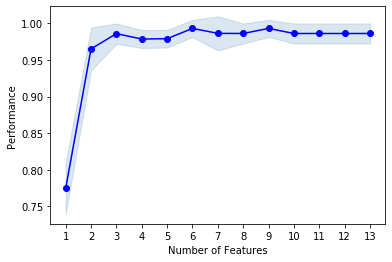

In [59]:
plot_sfs(sfs.get_metric_dict(),kind="std_dev")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x210f8c37b00>)

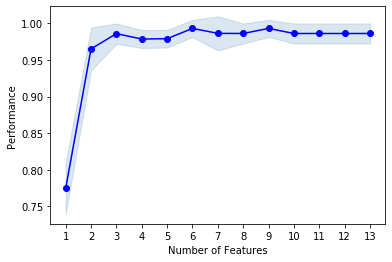

In [61]:
plot_sfs(sbs.get_metric_dict(),kind="std_dev")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x210f843ca20>)

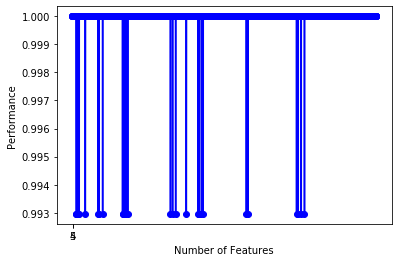

In [58]:
plot_sfs(efs.get_metric_dict(),kind="std_dev")

It has trained 2002 times and get the maximum accuracy many time which is 1